In [50]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from implementations_tanguy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from helpers import *

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

In [103]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
y, X = sample_data(y, products, seed, size_samples=100)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

### LEAST SQUARES WITH NORMAL EQUATIONS

In [104]:
print(y.shape, x.shape)

w_ls , loss_ls = least_squares(y,tx)
print(np.sqrt(2*loss_ls[0][0]))

#print(w_ls)

(100, 1) (100, 30)
0.6815592797922434


### Logistic Regression

In [105]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))


w_lr, loss_lr = logistic_regression(y,tx, initial_w, 100000, 0.00001)
print("loss", np.sqrt(2*loss_lr[0][0]))
#print(w_ls, "\n", w_lr)

#the loss becomes negative if we choose to big of a gamma and number of iterations
#it seems that at some point we go past the global minimum and start diverging 
#having a very small gamma solves this problem
#the minimal value I could find is 0.3665784

loss 0.8540743737271365


### Linear Cross-validation (half-half)

In [106]:
from cross_validation import *



k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_linear_gd(y, x,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)



train loss :  [[0.74812735]] test loss :  [[0.90850003]]


### cross_validation of logistic regression 

In [107]:

loss_train, loss_test = cross_validation_logistic_regression(y, x,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

train loss :  [[0.85936653]] test loss :  [[0.7800489]]


### Find best lambda for ridge regression

 the choice of lambda which leads to the best test rmse is 0.38566 with a test rmse of 0.844


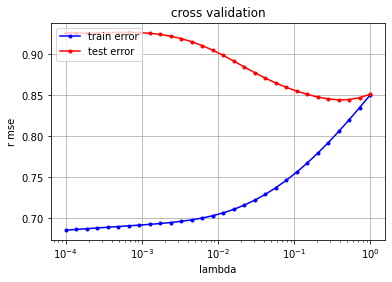

In [108]:
best_lambda, best_rmse = find_best_lambda_ridge_regression(x, y, 7, np.logspace(-4, 0, 30))